   Quarter      State  Total_Crashes  Num_Injured  Num_Killed  \
0  Q4 2020       Abia             30          146          31   
1  Q4 2020    Adamawa             77          234          36   
2  Q4 2020  Akwa Ibom             22           28           7   
3  Q4 2020    Anambra             72          152          20   
4  Q4 2020     Bauchi            154          685          90   

   Total_Vehicles_Involved  SPV  DAD  PWR  FTQ  ...  State_Taraba  State_Yobe  \
0                       37   19    0    0    0  ...         False       False   
1                       94   57    0    0    0  ...         False       False   
2                       24   15    0    0    1  ...         False       False   
3                       83   43    1    0    0  ...         False       False   
4                      140   74    0    0    0  ...         False       False   

   State_Zamfara       Region  Region_Encoded  Region_North East  \
0          False   South East               3         

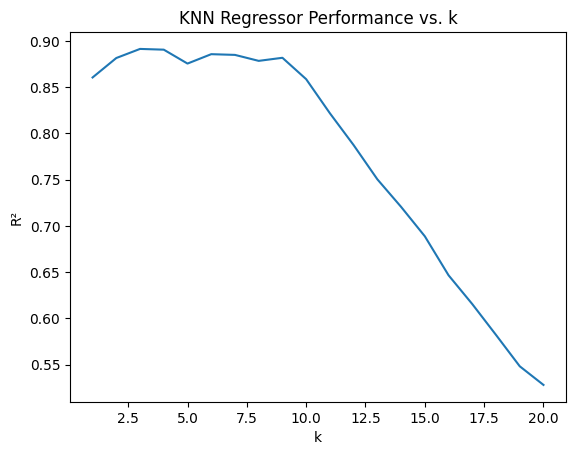

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("Nigeria Crash Data P.csv")

# Quick inspection
print(df.head())
print(df.info())
print(df.isnull().sum().sum())  # Check missing values (should be 0)

# Define features and target
# Target: Total_Casualties (sum of injured and killed)
# Features: We'll use crash-related numeric factors and state indicators.
# Avoid using derived columns that directly depend on casualties.
feature_cols = [
    'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors',
    'Quarter_Sin', 'Quarter_Cos'
] + [col for col in df.columns if col.startswith('State_')]  # all state dummies

# Ensure all selected features exist
feature_cols = [col for col in feature_cols if col in df.columns]

X = df[feature_cols]
y = df['Total_Casualties']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # default k=5, can be tuned
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Optional: try different k values
k_values = range(1, 21)
scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, scores)
plt.xlabel('k')
plt.ylabel('R²')
plt.title('KNN Regressor Performance vs. k')
plt.show()